## CHAPTER 04 분류

### 01. 분류(classification)의 개요
#### (1) 분류 
- 지도학습의 대표적인 유형, 학습데이터로 주어진 데이터의 피처와 레이블값을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 생성된 모델에 새로운 데이터값이 주어졌을 때 미지의 레이블 값을 예측
- 분류를 구현하는 머신러닝 알고리즘
 - 나이브 베이즈 (naive bayes) : 베이즈 통계와 생성 모델에 기반
 - 로지스틱 회귀 (logistic regression) : 독립변수와 종속변수의 선형 관계성에 기반
 - 결정 트리 (decision tree) : 데이터 균일도에 따른 규칙 기반
 - 서포트 벡터 머신 (SVM) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
 - 최소근접 (nearest neighbor) 알고리즘
 - 신경망 (neural network) : 심층 연결 기반. 
 - 앙상블 (ensemble) : 서로 다른/같은 머신러닝 알고리즘 결합
 
 
#### (2) 앙상블
- 이미지, 영상, 음성, NLP를 제외한 정형 데이터의 예측 분석 영역에서 매우 높은 예측 성능을 보임
- 일반적으로 배깅, 부스팅으로 나뉨
 - 배깅 : 뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성
 - 그래디언트 부스팅 : 뛰어난 예측 성능, 수행시간이 너무 오래걸리는 단점으로 최적화 모델 튜닝이 어려움
 - XgBoost, LightGBM
- 대부분 동일한 알고리즘을 결합함
- **결정트리** : 일반적으로 사용되는 기본 알고리즘 
 - 1) 데이터 스케일링, 정규화 등의 사전가공의 영향이 적음
 - 2) 예측성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 함 - 과적합 발생
 - 3) 앙상블에서 좋은 약한 학습기가 됨
 
### 02. 결정트리
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦
 - 규칙 노드 : 규칙조건. 정보 균일도가 높은 데이터세트를 먼저 선택할 수 있도록 함
 - 리프 노드 : 결정된 클래스값
 - 새로운 규칙 조건마다 서브 트리가 생성
- 깊이 (depth)가 깊어질수록 과적합으로 이어져 예측 성능이 저하될 수 있음
- 정보의 균일도 측정 방법 
 - a) 정보이득지수 (information gain) : 엔트로피 (주어진 데이터집합의 혼잡도)를 이용. 1-엔트로피 지수. 정보 이득이 높은 속성을 기준으로 분할
 - b) 지니 계수 : 0~1, 낮을수록 데이터 균일도가 높음. 지니계수가 낮은 속성을 기준으로 분할. DecisionTreeClassifier의 기본값
 
#### (1) 결정트리 모델의 특징
- '균일도'라는 룰을 기반으로 하고 있어 알고리즘이 쉽고 직관적임
- 룰이 명확하며, 이를 기반으로 어떻게 규칙노드와 리프노드가 만들어지는지 알 수 있고, 시각화로 표현할 수 있음
- 정보의 균일도만 신경쓰므로 특별한 경우를 제외하고 피처의 스케일링, 정규화같은 전처리작업이 필요 없음
- 단점 : 과적합으로 인한 정확도 감소. 복잡한 학습 모델은 테스트 데이터 세트에 유연하게 대처할 수 없어 예측 성능이 떨어질 수밖에 없음 -> 트리의 크기를 사전에 제한하는 것이 성능 튜닝에 도움

#### (2) 결정트리 파라미터
- 사이킷런 : CART (classification and regression trees) 기반 결정트리 구현
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수 (과적합 제어), default=2
- min_saples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수 (과적합 제어). 비대칭적 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있기에 작게 설정 필요
- max_features : 최적의 분할을 위해 고려할 최대 피처 개수. default=None
- max_depth : 트리의 최대 깊이를 규정. default=None
- max_leaf_nodes : 말단 노드의 최대 개수

#### (3) 결정 트리 모델의 시각화
- Graphviz 패키지를 사용해 결정 트리 알고리즘이 어떤 규칙을 가지고 트리를 생성하는지 시각화
- 사이킷런의 export_graphviz() API 사용 가능

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

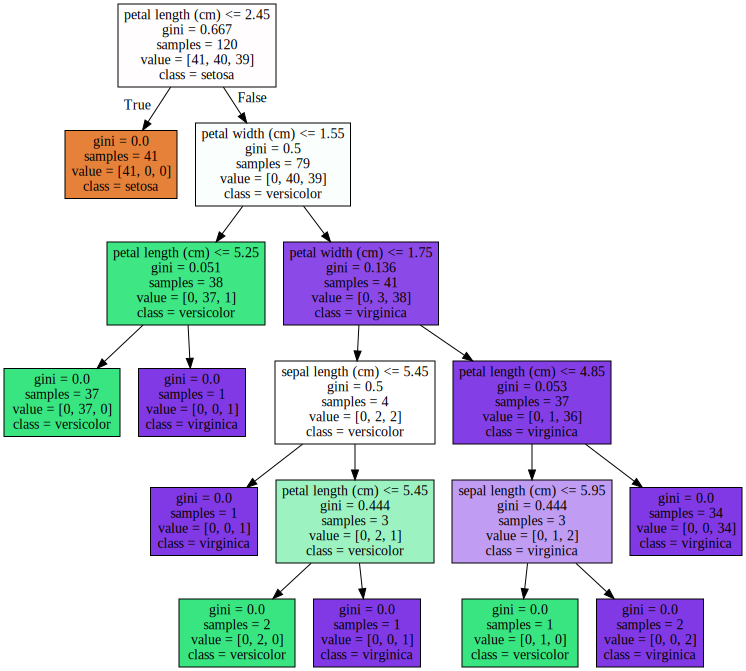

In [3]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", 
                class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, 
                impurity=True, 
                filled=True)

import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- petal length(cm) <= 2.45와 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 없으면 리프 노드
- gini는 value=[]로 주어진 데이터 분포에서의 지니 계수
- samples는 현규칙에 해당하는 데이터건수
- value=[]는 클래스 값 기반의 데이터 건수. value=[41,40,39]는 Setosa 41개, Versicolor 40개, Virginica 39개의 데이터 구성
- 각 노드의 색깔은 붓꽃 데이터의 레이블 값. 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많음  

#### * 하이퍼파라미터
 - max_depth : 작을수록 간단해짐
 - min_sample_splits : 클수록 간단해짐. 자식 노드로 분할하기 위한 최소한의 샘플 개수
 - min_sampels_leaf : 클수록 간단해짐. 는 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값

#### * DecisionTreeClassifier 객체의 feature_importance 속성 
 - 중요한 몇개의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하여, 모델을 좀더 간결하고 이상치에 강하도록 만듦
 - 결정트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표
 - ndarray 형태로 반환, 피처 순서대로 값 할당 
 - 값이 높을수록 해당 피처의 중요도가 높음

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

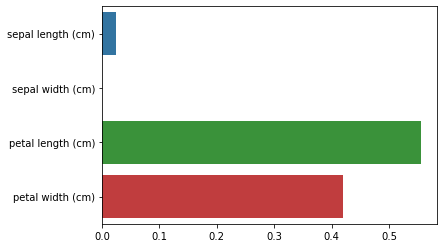

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))
      
# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

# feature importance를 column별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# petal_length가 가장 피처 중요도가 높음

### (3) 결정 트리 과적합(overfitting)

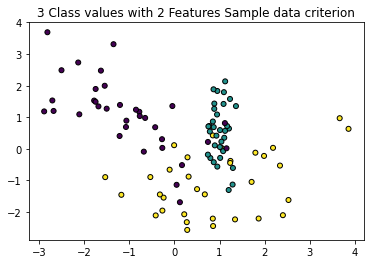

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data criterion")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
# make_classification() : 분류를 위한 테스트용 데이터를 쉽게 만들수 있는 함수
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [6]:
def visualize_boundary(model, X, y):
    # 머신러닝 모델이 클래스 값을 예측하는 결정 기준을 색상과 경계로 나타냄
    # 모델이 어떻게 데이터 세트를 예측 분류하는지 잘 이해할 수 있게 해줌
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

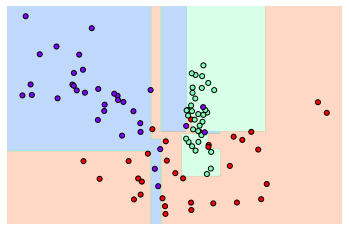

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치 데이터(Outlier)까지 분류하기 위해 분할이 자주 일어나, 결정 기준 경계가 매우 많아짐
- 리프 노드 안에 데이터가 모두 균일하거나 하나만 존재해야 하는 엄격한 분할 기준 때문에 결정 기준 경계가 많아지고 복잡해짐
- 학습 데이터와 약간만 다른 형태의 데이터 세트 측정시 예측 정확도 떨어짐

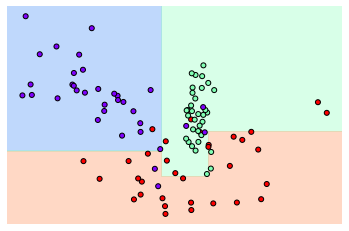

In [8]:
# min_samples_leaf = 6으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier( min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않으면서 좀더 일반화된 분류 규칙에 따라 분류됨
- 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높음

## 03. 앙상블 학습
### (1) 앙상블 학습 개요
- 앙상블 학습(Ensemble Learning)을 통한 분류 : 여러 개의 분류기를 생성하고, 그 예측을 결합하여 정확한 최종 예측을 도출하는 기법으로, 다양한 분류기의 예측 결과를 결합함으로써 보다 정확한 최종 예측 도측
- 이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류는 앙상블이 뛰어난 성능
- **랜덤 포레스트, 그래디언트 부스팅** " 대표적인 앙상블 알고리즘. 뛰어난 성능과 쉬운 사용, 다양한 활용도
- **XGBoost, LightGBM, Stacking** 등 기존의 그래디언트 부스팅을 뛰어넘는 새로운 알고리즘들 개발
- 전통적으로 나눠지는 앙상블 학습의 유형 : **Voting, Bagging, Boosting**
 - Voting과 Bagging은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정
 - **보팅**은 일반적으로 서로 다른 알고리즘을 가진 분류기가 결합
 - **배깅**은 데이터 샘플링을 서로 다르게 하여 모두 같은 유형의 알고리즘을 기반으로 학습을 수행해 보팅 수행 (ex. 랜덤 포레스트)
 - Bootstrapping 분할 방식 : 개별 Classifier에게 데이터를 샘플링해서 추출. 중첩 허용
 - **부스팅**은 여러 개의 Classifier가 순차적으로 학습을 수행하되, 앞에서 학습한 Classifier가 잘못 예측한 데이터에 대해서 올바르게 예측할 수 있다라고 가중치를 부여하여 다음 Classifier에서 학습과 예측을 진행
- **스태킹**은 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측

### (2) 보팅 유형 - 하드 보팅(hard voting)과 소프트 보팅(soft voting)
- **하드 보팅(Hard Voting)** : 예측한 결과값들 중 다수의 Classifier가 결정한 예측값을 최종 보팅 결과값으로 선정
- **소프트 보팅(Soft Voting)** : Classifier들의 Label 값 결정 확률을 모두 더하고 이를 평균해서, 이들 중 확률이 가장 높은 Label 값을 최종 보팅 결과값으로 선정한다.
- 일반적으로 소프팅 보팅 적용

### (3) 보팅 분류기 (voting classifier)

In [9]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# import data
cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# 개별모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft')
# voting의 default는 'hard'
# estimators는 리스트 값으로 보팅에 사용될 classifier 객체들을 튜플 형식으로 입력

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

# Voting 분류기의 정확도가 조금 높음

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


- 보팅으로 여러 개의 기반 분류기를 결합하더라도, 무조건 기반 분류기보다 성능이 좋은 것은 아님
- 그럼에도 불구하고, 전반적으로 보팅, 배깅, 부스팅 등 앙상블 방법은 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음
- 고정된 데이터 세트에서 단일 ML 알고리즘이 뛰어난 성능을 발휘하더라도, 다양한 변수와 예측이 어려운 규칙으로 구성돼 있는 현실 세계에서는 다양한 관점을 가진 알고리즘이 서로 결합헤 더 나은 성능을 끌어낼 수 있음
- ML 모델의 성능은 다양한 테스트 데이터에 의해 검증되므로 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 중요한 ML 모델의 평가 요소

## 04. 랜덤 포레스트
### (1) 랜덤 포레스트의 개요 및 실습
- 배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어 보팅으로 최종 결정하는 알고리즘
- 배깅의 대표적인 알고리즘인 **랜덤 포레스트** : 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지며, 다양한 영역에서 높은 예측 성능
  - 기반 알고리즘은 결정 트리로, 결정 트리의 쉽고 직관적인 장점을 그대로 가짐
  - 여러 개의 결정 트리 분류기가 전체 대이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습한 뒤 모든 분류기가 보팅을 통해 예측 결정
  - 여러 개의 데이터셋을 중첩되게 분리하는 Bootstrapping 방식 분할 방식
  - **부트스트랩** : 통계학에서 여러 개의 작은 데이터셋을 임의로 만들어 개별 평균의 분포도를 측정하는 등의 목적을 위한 샘플링 방식

In [13]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당

    feature_name_df = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/features.txt',sep='\s+', header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. Column 명은 feature_name 적용
    My_X_train = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/train/X_train.txt',sep='\s+', names = feature_name)
    My_X_test = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    My_y_train = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    My_y_test = pd.read_csv('C:/Users/Jaewon/ESAA/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return My_X_train, My_X_test, My_y_train, My_y_test

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

# 별도의 테스트셋으로 예측 성능 평가
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### (3) 랜덤 포레스트 하이퍼 파라미터 튜닝
- 트리 기반 앙상블 알고리즘의 단점 : 하이퍼파라미터가 많아 튜닝을 위한 시간이 많이 소모. 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않음
 - 1) n_estimators : 랜덤 포레스트에서 결정 트리의 개수를 지정. Default=10. 많이 설정한다고 해서 성능이 무조건 향상되는 것은 아니며, 늘릴수록 학습 수행 시간이 길어짐
 - 2) max_features : 결정 트리와 동일하게 최적의 분할을 위해 고려할 최대 피처 개수를 지정. Default=auto(sqrt)
 - 3) max_depth : 트리의 최대 깊이. Default=None으로 완벽하게 클래스 결정값이 될 때까지 깊이를 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
 - 4) min_samples_leaf : 말단 노드(Leaf)의 최대 개수

In [15]:
#  GridSearchCV를 이용한 랜덤포레스트의 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth': [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 100}
최고 예측 정확도: 0.9165


In [16]:
# n_estimators를 300으로 증가시키고 최적화 하이퍼 파라미터로 다시 RandomForestClassifier 학습시켜 별도의 테스트 데이터 세트에서 예측성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


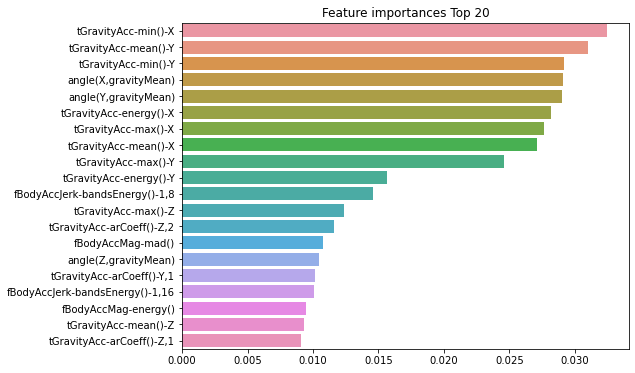

In [17]:
# 피처 중요도를 막대그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## 05. GBM(Gradient Boosting Machine)

### (1) GBM의 개요 및 실습
- 부스팅 알고리즘 : WL 여러개를 순차적으로 학습, 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습
- **에이다부스트(AdaBoost)** : 오류 데이터에 가중치를 부여하면서 부스팅을 수행
 - 첫번째 WL로 분류 후, 다음 WL가 더 오류 데이터에 대해서 잘 분류할 수 있도록 해당 오류 데이터값에 대해서 가중치 값 부여
 - 잘못 분류된 오류 데이터에 대해 다음 WL가 잘 분류할 수 있게 더 큰 가중치 부여
 - 이렇게 WL가 순차적으로 오류값에 대해 가중치를 부여한 예측 결정 기준을 모두 결합해 예측 수행
- **GBM(Gradient Boost Machine)** : 가중치 업데이트를 경사 하강법 (Gradient Descent)을 이용
 - 오류식 h(x) = y - F(x)를 최소화하는 방향으로 가중치를 업데이트
 - 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법 

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')
X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 751.6 초 


- 기본 하이퍼 파라미터만으로 앞의 랜덤 포레스트보다 나은 예측 성능을 보임
- 일반적으로 GBM이 랜덤 포레스트보다 예측 성능이 조금 더 뛰어남
- 수행 시간이 길고, 하이퍼 파라미터를 튜닝이 어렵다는 단점 극복 필요

### (2) GBM 하이퍼 파라미터 및 튜닝
- **loss** : 경사 하강법에 사용할 loss 함수 지정. Default='deviance'
- **learning_rate** : GBM이 학습을 진행할 때마다 적용하는 학습률. Weak learner가 순차적으로 오류값을 보정해나갈때 적용하는 계수이며, 0~1 사이의 값, Default=0.1. 너무 작은 값 적용시 예측 성능이 높아질 수 있지만, 수행 시간이 오래 걸리며 최소 오류값을 찾지 못할 수 있음 => n_estimators와 상호 보완적으로 조합해 사용
- learning_rate를 작게하고  n_estimator를 크게 하면 더이상 성능이 좋아지지 않는 한계점까지는 예측 성능이 조금씩 좋아질 수 있음
- **n_estimator** : weak leaner의 개수. 개수가 많을수록 예측성능이 일정 수준까지는 좋아질 수 있음. default=100
- **subsample** : weak learner가 학습에 사용하는 데이터의 샘플링 비율. default=1, 과적합 염려시 1보다 작은 값으로 설정

In [ ]:
# 수행 시간이 너무 오래걸려 해당 셀부터 실행되지 않음
# 수행 시간을 고려하여, n_estimators를 100, 500으로, learning_rate을 0.05, 0.1로만 제한
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# learning_rate가 0.05, n_estimators가 500일 때 2개의 교차검증세트에서 정확도가 최고로 도출됨
# 위의 설정을 그대로 테스트데이터세트에 적용해 예측 정확도 확인
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

- GVM은 과적합에도 강한 뛰어난 예측 성능을 가진 알고리즘이지만 수행시간이 오래 걸린다는 단점